In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import FunctionTransformer


In [2]:
# Loading datasets
data_dev = pd.read_csv('datasets/development_features_20.csv')
data_eval = pd.read_csv('datasets/evaluation_features_20.csv')

Xdata_dev = data_dev.drop(columns=['path', 'Id', 'age', 'num_words'])
ydata_dev = data_dev['age']
Xdata_eval = data_eval.drop(columns=['path', 'Id', 'num_words'])



In [3]:
# Seleziona solo le variabili numeriche
numerical_columns = Xdata_dev.select_dtypes(include=['float64', 'int64']).columns

non_binary_columns = [col for col in numerical_columns if Xdata_dev[col].nunique() > 2]


# Crea un boxplot per ogni variabile numerica

'''
for col in non_binary_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=Xdata_dev[col])
    plt.title(f"Boxplot per {col}")
    plt.xlabel(col)
    plt.show()
    '''

'\nfor col in non_binary_columns:\n    plt.figure(figsize=(8, 4))\n    sns.boxplot(x=Xdata_dev[col])\n    plt.title(f"Boxplot per {col}")\n    plt.xlabel(col)\n    plt.show()\n    '

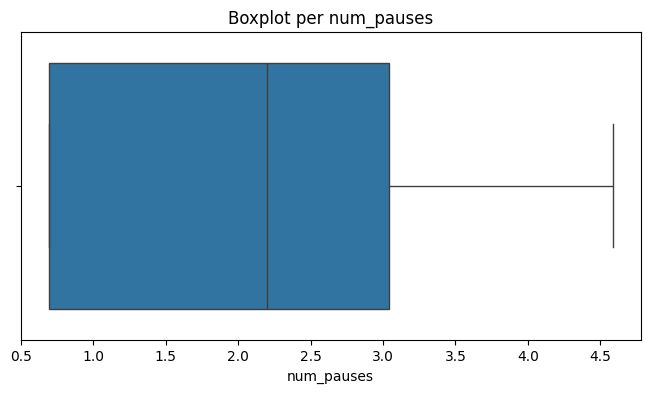

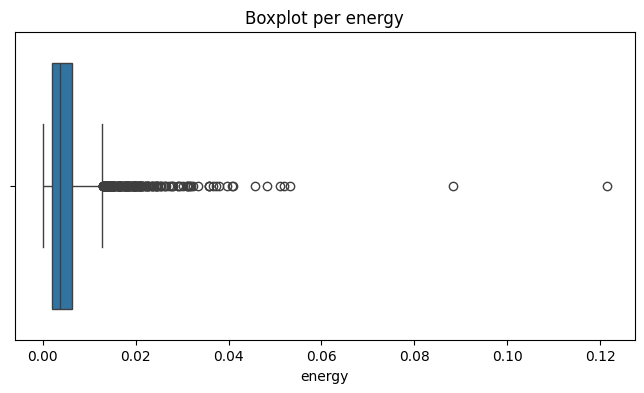

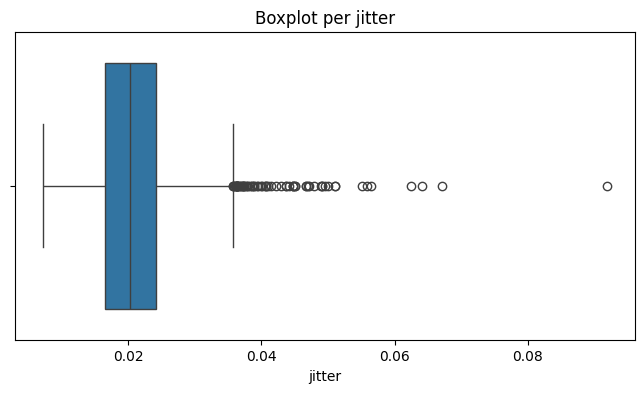

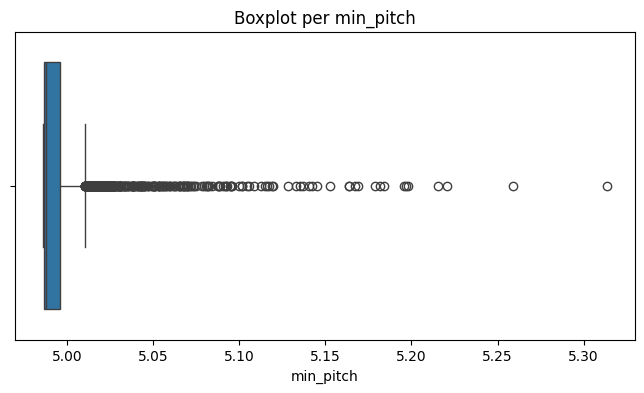

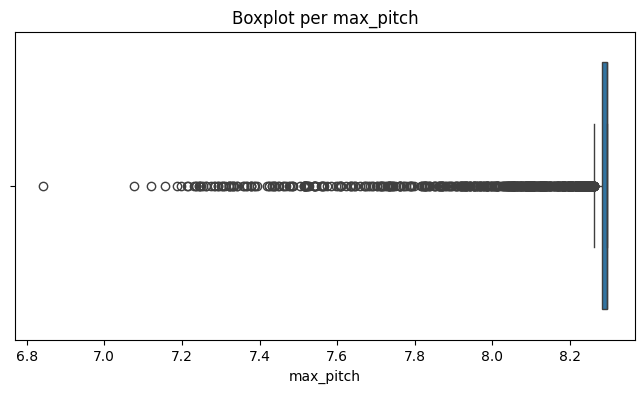

In [32]:
# change the variable in log scale for
# num pauses, energy, jitter, minpitch, maxpitch

# log transformation

copy_dev = Xdata_dev.copy()
copy_eval = Xdata_eval.copy()

for col in ['num_pauses',  'energy', 'jitter', 'min_pitch', 'max_pitch']:
    copy_dev[col] = np.log1p(copy_dev[col])

for col in ['num_pauses', 'energy', 'jitter', 'min_pitch', 'max_pitch']:
    copy_eval[col] = np.log1p(copy_eval[col])

# create the poxplot for the new variables
for col in ['num_pauses','energy', 'jitter', 'min_pitch', 'max_pitch']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=copy_dev[col])
    plt.title(f"Boxplot per {col}")
    plt.xlabel(col)
    plt.show()

# create a male and female dataset

female_dev = copy_dev[copy_dev['gender_female'] == 1]
y_data_female = ydata_dev[copy_dev['gender_female'] == 1]

male_dev = copy_dev[copy_dev['gender_female'] == 0]
y_data_male = ydata_dev[copy_dev['gender_female'] == 0]



In [ ]:
# Dividing the dataset into development and validation
X_train, X_validation, y_train, y_validation = train_test_split(copy_dev, ydata_dev, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)




179
[-0.06205716 -0.06205716 -0.06205716 ... -0.06205716 -0.06205716
 -0.06205716]
[]


In [37]:
# ridge male e female

import math


X_train_male, X_validation_male, y_train_male, y_validation_male = train_test_split(male_dev, y_data_male, test_size=0.2, random_state=42)
X_train_female, X_validation_female, y_train_female, y_validation_female = train_test_split(female_dev, y_data_female, test_size=0.2, random_state=42)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)


model_female = Ridge(alpha=0.1,
              random_state=42,
              max_iter=1000,
              solver='auto',
              fit_intercept=True)

model_male = Ridge(alpha=0.1,
              random_state=42,
              max_iter=1000,
              solver='auto',
              fit_intercept=True)

rfe_f = RFE(model_female, n_features_to_select= 50)  
rfe_f.fit(X_train_female, y_train_female)

rfe_m = RFE(model_male, n_features_to_select= 50)  
rfe_m.fit(X_train_male, y_train_male)

X_train_female = rfe_f.transform(X_train_female)
X_validation_female = rfe_f.transform(X_validation_female)

X_train_male = rfe_f.transform(X_train_male)
X_validation_male = rfe_f.transform(X_validation_male)

model_female.fit(X_train_female, y_train_female)
y_female_pred=model_female.predict(X_validation_female)


model_male.fit(X_train_male, y_train_male)
y_male_pred=model_male.predict(X_validation_male)

score_female = mean_squared_error(y_validation_female, y_female_pred)
score_male = mean_squared_error(y_validation_male, y_male_pred)

print(math.sqrt(score_male+score_female))

(2346, 231) (587, 231) (2346,) (587,)
16.507297766553975


Number of components: 1
R2 score: 0.22206575900514436
RMSE: 11.351486865345027
 
Number of components: 3
R2 score: 0.305547475329648
RMSE: 10.725130562436815
 
Number of components: 7
R2 score: -0.06718072542009379
RMSE: 13.295365887793832
 
Number of components: 15
R2 score: -0.19569221879794618
RMSE: 14.07314002111513
 
Number of components: 25
R2 score: 0.09477799228628703
RMSE: 12.245001966143253
 
Number of components: 35
R2 score: -0.19378016441321155
RMSE: 14.06188320485866
 
Number of components: 46
R2 score: -0.14380967983416504
RMSE: 13.764428716624899
 
Number of components: 57
R2 score: -0.05337500761306391
RMSE: 13.2090873538631
 
Number of components: 67
R2 score: -0.03143105134032975
RMSE: 13.070777085825904
 
Number of components: 78
R2 score: 0.0344017349388307
RMSE: 12.646767823286995
 
Number of components: 89
R2 score: -0.024237597205571504
RMSE: 13.02511792799093
 
Number of components: 100
R2 score: 0.04712382751357458
RMSE: 12.56317880210481
 
Number of component

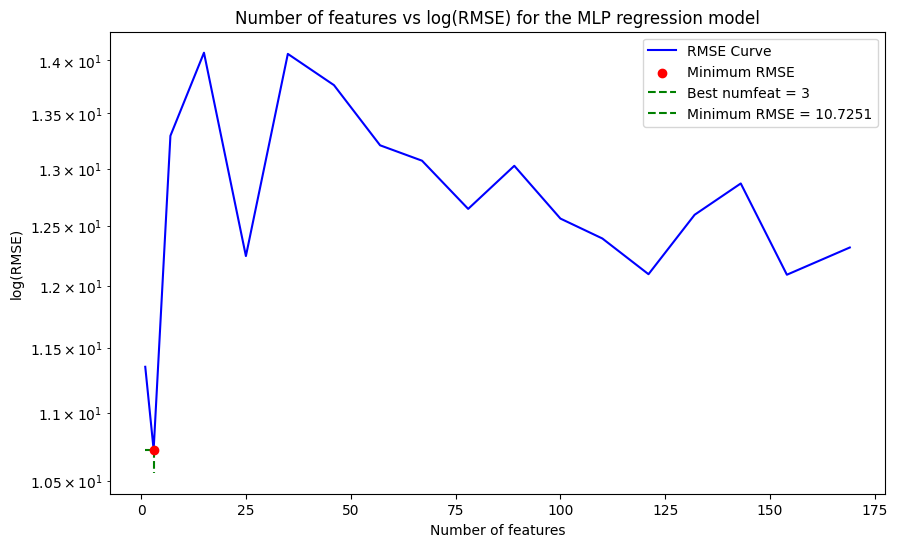

In [8]:

# calling a pca for the 95 perc of the variance

perc_max = 1
perc_vec = np.arange(0.1, perc_max, 0.05)
score = []
best_score = 50
best_perc = 0
numb_feat = []
best_numfeat = 0

for i in perc_vec:

    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_validation_pca = pca.transform(X_validation)

    numb_feat.append(pca.n_components_)

    print('Number of components:', pca.n_components_)

    mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, random_state=42)
    mlp.fit(X_train_pca, y_train)
    y_pred = mlp.predict(X_validation_pca)
    s = root_mean_squared_error(y_validation, y_pred)
    print('R2 score:', r2_score(y_validation, y_pred))
    print('RMSE:', s)
    print(' ')
    score.append(s)

    if s < best_score:
        best_score = s
        best_perc = i
        best_numfeat= pca.n_components_

print('Best score:', best_score)

plt.figure(figsize=(10, 6))
plt.plot(numb_feat, score, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the MLP regression model')
plt.legend()

plt.savefig('rmse_curve_mlp.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

In [22]:
# grid search for the best parameters

i = 56  # 56 best

selector = SelectKBest(f_regression, k=i)
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_validation_sel = selector.transform(X_validation)

param_grid = {
    'hidden_layer_sizes': [(100, 100, 100, 100), (100, 100, 100), (100, 100), (100, 100, 100, 100, 100)],
    'alpha': [512, 256, 1024, 2048, 4096],
    'max_iter': [1000, 2000,500]
}

mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sel, y_train)
y_pred_mlp= grid_search.predict(X_validation_sel)

print('Best parameters:', grid_search.best_params_)
#print('Best score train:', -grid_search.best_score_)
print('Best score test:', root_mean_squared_error(y_validation, y_pred_mlp))


Best parameters: {'alpha': 256, 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 1000}
Best score test: 9.392332927750687


In [ ]:
# call mlp selecting the best number of features

max_feature = len(Xdata_dev.columns)
score = []
best_score = 50
numb_feat = []
best_numfeat = 0


for i in range(1, max_feature+1,1):

    selector = SelectKBest(f_regression, k=i)
    selector.fit(X_train, y_train)
    X_train_sel = selector.transform(X_train)
    X_validation_sel = selector.transform(X_validation)

    mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, random_state=42, alpha=1)
    mlp.fit(X_train_sel, y_train)
    y_pred = mlp.predict(X_validation_sel)
    s = root_mean_squared_error(y_validation, y_pred)
    print('R2 score:', r2_score(y_validation, y_pred))
    print('RMSE:', s)
    print(' ')

    score.append(s)

    if s < best_score:
            best_score = s
            best_perc = i
            best_numfeat = selector.k

print('Best score:', best_score)

plt.figure(figsize=(10, 6))
plt.plot(numb_feat, score, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the MLP regression model')
plt.legend()

plt.savefig('rmse_curve_mlp_selecting_features.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()


R2 score: 0.3083959073918101
RMSE: 10.70311235702918
 
R2 score: 0.3070368961217267
RMSE: 10.71362307543463
 
R2 score: 0.3260075897173652
RMSE: 10.565956302242355
 
R2 score: 0.3433538632873272
RMSE: 10.429104135875583
 
R2 score: 0.33285850481802937
RMSE: 10.512119377964664
 
R2 score: 0.3674144939401348
RMSE: 10.23625098084913
 
R2 score: 0.27182166424680076
RMSE: 10.982474010445804
 
R2 score: 0.21720402798275473
RMSE: 11.386902403456943
 
R2 score: 0.21756669720173571
RMSE: 11.384264323050543
 
R2 score: -0.08795230053633607
RMSE: 13.42413263999097
 
R2 score: 0.13689643999545786
RMSE: 11.956739327985947
 
R2 score: -0.14558103209073892
RMSE: 13.77508268292022
 
R2 score: -0.19232352871051694
RMSE: 14.053301518784021
 
R2 score: -0.00296640393297376
RMSE: 12.889156595283614
 


c:\Users\RENATO\Desktop\Universita\Magistrale\Anno 1\Data science lab\Homework_Data_science\ambiente_virtuale\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


R2 score: 0.36697661662516523
RMSE: 10.239793147614604
 


In [12]:
model = Ridge(alpha=0.1,
              random_state=42,
              max_iter=1000,
              solver='auto',
              fit_intercept=True)
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the Ridge regression model')
plt.legend()

plt.savefig('rmse_curve_ridge_polinomial.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

numfeat = 1 , RMSE = 10.775897535015847 
numfeat = 2 , RMSE = 10.685849079415856 
numfeat = 3 , RMSE = 10.655771970088407 


KeyboardInterrupt: 

In [39]:
scaler = StandardScaler()

scaler.fit(copy_dev)
X_final_train = scaler.transform(copy_dev)
X_final_validation = scaler.transform(copy_eval)

y_final_train = ydata_dev

model = Ridge(alpha=0.1,    
                random_state=42,
                max_iter=1000,
                solver='auto',
                fit_intercept=True)

# select the best features
rfe = RFE(model, n_features_to_select= best_numfeat)
print(f'Best number of features: {best_numfeat}')
rfe.fit(X_final_train, y_final_train)

X_final_train_selected = rfe.transform(X_final_train)
X_final_validation_selected = rfe.transform(X_final_validation)

model.fit(X_final_train_selected, y_final_train)

# MRSE for the train
y_final_pred_train = model.predict(X_final_train_selected)

rmse_train = root_mean_squared_error(y_final_train, y_final_pred_train)

print(f'RMSE for the train: {rmse_train}')







Best number of features: 50
RMSE for the train: 9.95964132349361


numfeat = 1 , RMSE = 10.775897535015847 
numfeat = 2 , RMSE = 10.674541219235005 
numfeat = 3 , RMSE = 10.675621547561603 
numfeat = 4 , RMSE = 10.465110258939754 
numfeat = 5 , RMSE = 10.240669925195656 
numfeat = 6 , RMSE = 10.058343806075502 
numfeat = 7 , RMSE = 10.061582314792624 
numfeat = 8 , RMSE = 10.038028546842089 
numfeat = 9 , RMSE = 9.932797058958332 
numfeat = 10 , RMSE = 9.871786433518546 
numfeat = 11 , RMSE = 9.86336072841561 
numfeat = 12 , RMSE = 9.836591840822674 
numfeat = 13 , RMSE = 9.799120450196442 
numfeat = 14 , RMSE = 9.778525553459911 
numfeat = 15 , RMSE = 9.750770649254932 
numfeat = 16 , RMSE = 9.769250870620391 
numfeat = 17 , RMSE = 9.73984886985092 
numfeat = 18 , RMSE = 9.731283759088841 
numfeat = 19 , RMSE = 9.742306929851477 
numfeat = 20 , RMSE = 9.734906913630912 
numfeat = 21 , RMSE = 9.73721939711627 
numfeat = 22 , RMSE = 9.718142949605912 
numfeat = 23 , RMSE = 9.734630216668727 
numfeat = 24 , RMSE = 9.739037150532639 
numfeat = 25 , RMSE 

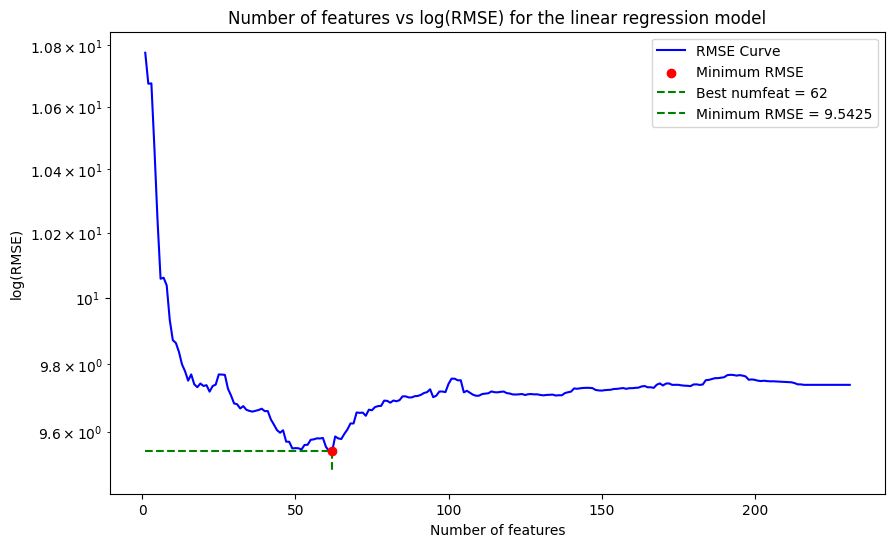

In [10]:
# Linear Regressor
model_lin = LinearRegression()
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model_lin, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the linear regression model')
plt.legend()

plt.savefig('rmse_curve_linear.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

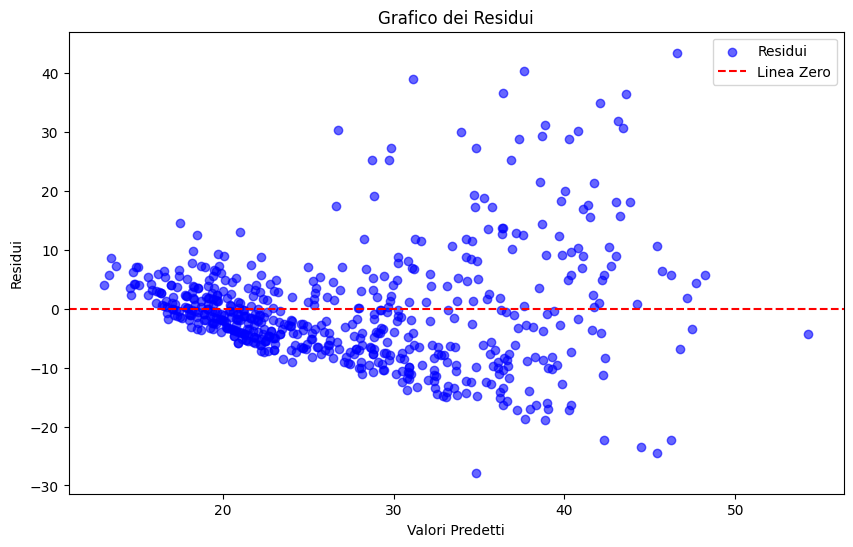

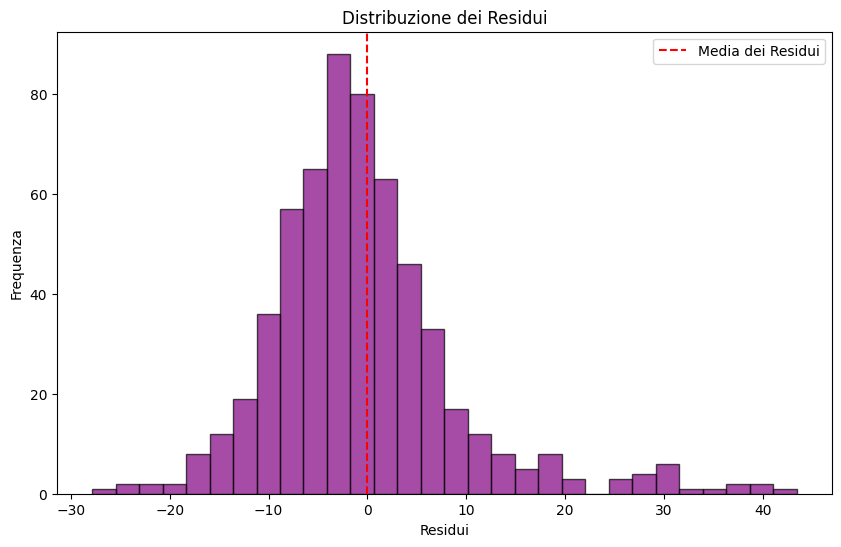

In [14]:
# Calcolo dei residui
residuals = y_validation - y_pred

# Scatter plot dei residui
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="blue", label="Residui")
plt.axhline(0, color='red', linestyle='--', label="Linea Zero")  # Linea di riferimento a residuo zero
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Grafico dei Residui")
plt.legend()
plt.show()

# Istogramma dei residui
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label="Media dei Residui")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Residui")
plt.legend()
plt.show()


numfeat = 1 , RMSE = 10.776473695013253 
numfeat = 2 , RMSE = 10.675189144355627 
numfeat = 3 , RMSE = 10.676217657053666 
numfeat = 4 , RMSE = 10.468405092144678 
numfeat = 5 , RMSE = 10.244857119619743 
numfeat = 6 , RMSE = 10.134104429746147 
numfeat = 7 , RMSE = 10.123728794701714 
numfeat = 8 , RMSE = 10.113969397523455 
numfeat = 9 , RMSE = 10.063798136009597 
numfeat = 10 , RMSE = 9.983729777273036 
numfeat = 11 , RMSE = 9.917145396413462 
numfeat = 12 , RMSE = 9.824560643190274 
numfeat = 13 , RMSE = 9.785383752924417 
numfeat = 14 , RMSE = 9.755727493356574 
numfeat = 15 , RMSE = 9.759194968991912 
numfeat = 16 , RMSE = 9.739253093255478 
numfeat = 17 , RMSE = 9.771650911798426 
numfeat = 18 , RMSE = 9.772389915666343 
numfeat = 19 , RMSE = 9.783407184380945 
numfeat = 20 , RMSE = 9.776681655706172 
numfeat = 21 , RMSE = 9.777074554556958 
numfeat = 22 , RMSE = 9.768232599187472 
numfeat = 23 , RMSE = 9.751769842374935 
numfeat = 24 , RMSE = 9.750952695189422 
numfeat = 25 , R

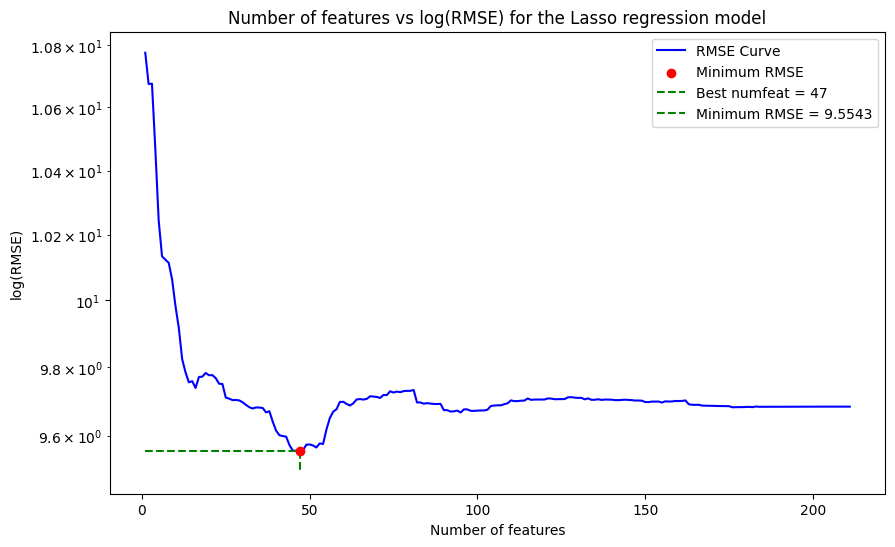

In [5]:
model = Lasso(alpha=0.01,
              random_state=42,
              max_iter=1000,
              fit_intercept=True)
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the Lasso regression model')
plt.legend()

plt.savefig('rmse_curve_lasso.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()